In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Experiment1 Configurations

SIM_NUM = 5 # number of simulation times
TRUST_UPDATE = 1 #When update the reputation matrix
A = 0.5
PEER_PSEUDONYM = ['Josep', 'David', 'Oriol','Alberto', 'Jesus', 'Michel', 'Fadi', 'Rami', 'Ashneet', 'Najeeb']
PEER_NUM = 10 # "number of peers: K" 
PEER_FRAC = 0.7 #'the fraction of peers: C to bel selected in each round'
ACM_FRAC = 0.3 #'the fraction of accountability managers :ACM'
UNTARGETED_ATTACK_RATES = [0.3] #different rates of random attack
STEALTHY_POSONING_RATES = [0.3] #different rates of stealthy attack
RANDOM_MALICIOU_BEHAVIOUR_RATE = 0.7
STEALTHY_MALICIOU_BEHAVIOUR_RATE = 0.7
MAPPING_LIST = [0, 1, 2, 3, 9, 5, 6, 7, 8, 9]
SEED = 0 #fixed seed
NORMAL_TAU = 1.5 # value of tau to dtermine outliers based on the rule Q1 - tau * IQR =< dist <= Q3 + tau * IQR 
TARGETED_TAU = 0.2
INTIAL_REPUTATION = [1/PEER_NUM for i in range(PEER_NUM)] #initialization of reputation values 
                                #with 1/PEER_NUM for each PEER             
GLOBAL_ROUNDS = 10 #"number of rounds of federated model training"
LOCAL_EPOCHS = 3 #"the number of local epochs: E for each peer"
LOCAL_BS = 10 #"local batch size: B for each peer"
LOCAL_LR =  0.0003#local learning rate: lr for each peer
LOCAL_MOMENTUM = 0.9 #local momentum for each peer
NUM_CLASSES = 10 # number of classes in an experiment

LABELS_DICT = {"zero":0, 
        "one":1,
        "two":2,
        "three":3,
        "four":4,
        "five":5,
        "six":6,
        "seven":7,
        "eight":8,
        "nine":9}

CLASSES_LIST = ('Zero', 'One', 'Two',  'Three',  'Four',  'Five',
                       'Six',   'Seven', 'Eight', 'Nine')

#select the device to work with cpu or gpu
if torch.cuda.is_available():
    DEVICE = "cuda:0"
else:
    DEVICE = "cpu"
    
DEVICE = torch.device(DEVICE)


random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)

NameError: name 'torch' is not defined

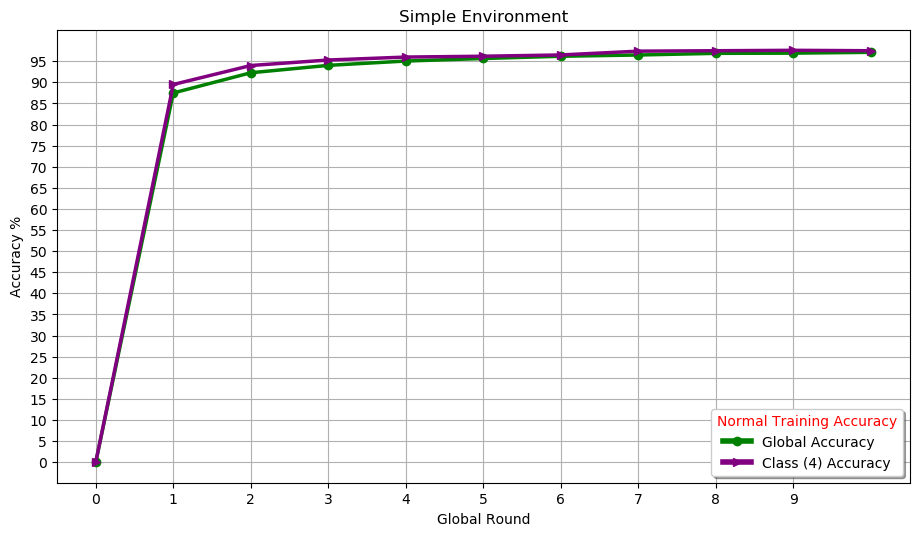

In [3]:
#Experiment1

x = [i for i in range(11)]

y1 = np.asarray([0, 0.8749, 0.9228, 0.9403, 0.9506, 0.9566, 0.9619, 0.9649, 0.9688, 0.9693, 0.9712])
y2 = np.asarray([0, 89.5, 94.0,95.3, 96, 96.2, 96.5, 97.4, 97.5, 97.6, 97.5])


# make some data
fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Global Accuracy', marker='o', color = 'Green')
ax.plot(x, y2, linewidth=2.5, label='Class (4) Accuracy', marker='>', color = 'Purple')

leg = ax.legend(ncol=1, shadow=True, title="Normal Training Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("Simple Environment")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

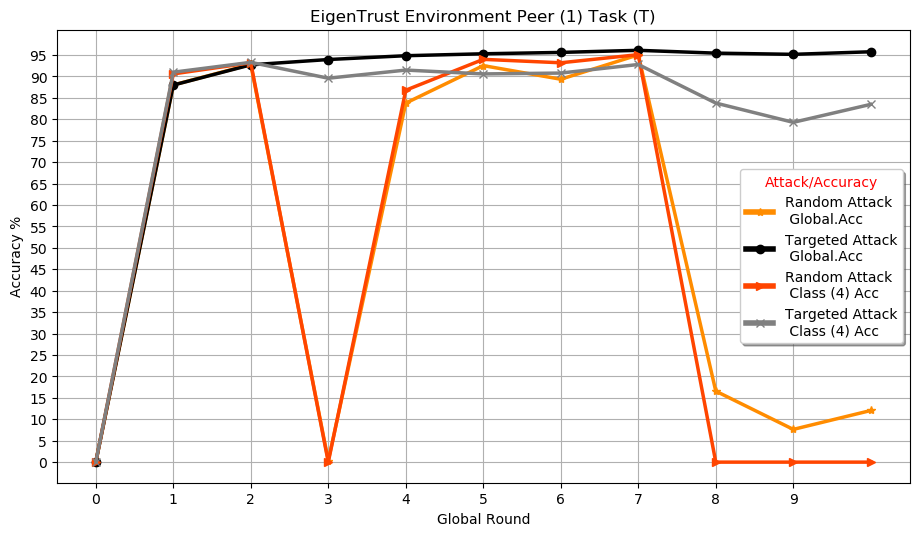

In [4]:
#Experiment1

x = [i for i in range(11)]

y1 = np.asarray([0, 0.8802, 0.9281, 0.0034, 0.8379, 0.9254, 0.8936, 0.9505, 0.1657, 0.0764, 0.1205])
y2 = np.asarray([0, 0.88, 0.9272, 0.9396, 0.9485, 0.953, 0.9562, 0.9611, 0.9545, 0.9517, 0.9577])
y3 = np.asarray([0, 90.6, 93.2, 0, 86.8, 94, 93.2, 95.1, 0, 0, 0])
y4 = np.asarray([0, 91, 93.3, 89.6, 91.5, 90.6, 90.8, 92.8, 83.8, 79.3, 83.5])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (1) Task (T)")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

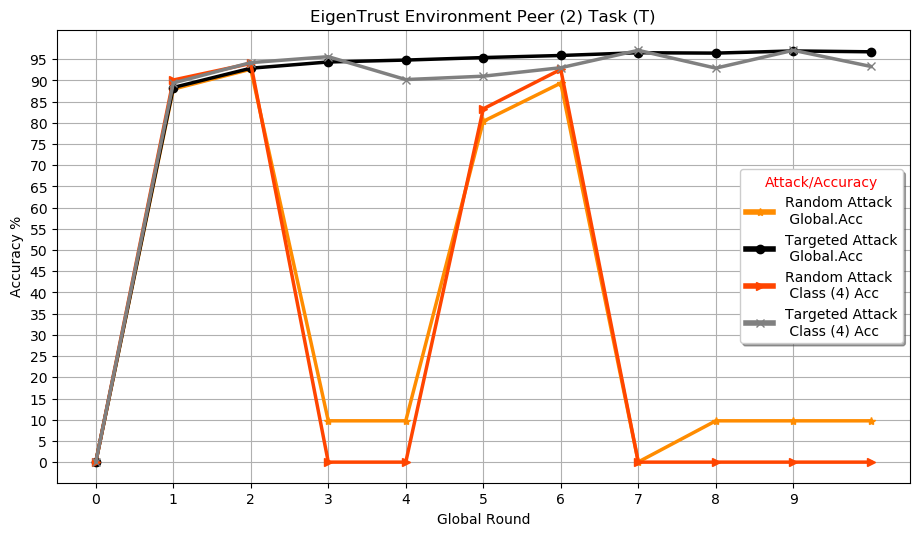

In [5]:
#Experiment1

x = [i for i in range(11)]

y1 = np.asarray([0, 0.8795, 0.9264, 0.0974, 0.0974, 0.8035, 0.8937, 0.0004, 0.0974, 0.0974, 0.0974])
y2 = np.asarray([0, 0.8833, 0.9288, 0.9435, 0.948, 0.9539, 0.9588, 0.9653, 0.9644, 0.9695, 0.9675])
y3 = np.asarray([0, 90.1, 94, 0, 0, 83.3, 92.6, 0, 0, 0, 0])
y4 = np.asarray([0, 89.4, 94.2,95.6,  90.2,91, 93, 97.1, 92.9, 97.1, 93.3])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (2) Task (T)")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

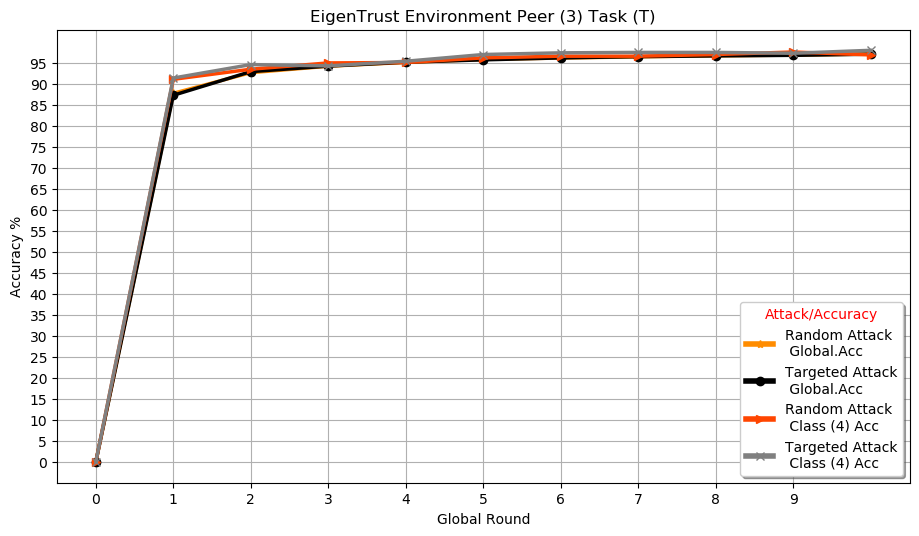

In [6]:
#Experiment1

x = [i for i in range(11)]

y1 = np.asarray([0, 0.8777, 0.9268, 0.9421, 0.9512, 0.9584, 0.9616, 0.9645, 0.9669, 0.9686, 0.9711])
y2 = np.asarray([0, 0.873, 0.9293, 0.9425, 0.9518, 0.9573, 0.962, 0.965, 0.9668, 0.9681, 0.9708])
y3 = np.asarray([0, 91.1, 93.5, 95, 95.1, 96.2, 96.6, 96.6, 97, 97.6, 96.9])
y4 = np.asarray([0, 91.4, 94.6, 94.3, 95.4, 97, 97.4, 97.5, 97.5, 97.3, 98])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (3) Task (T)")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

In [7]:
#Experiment2 Configurations

SIM_NUM = 5 # number of simulation times
TRUST_UPDATE = 1 #When update the reputation matrix
A = 0.5
PEER_PSEUDONYM = ['Josep', 'David', 'Oriol','Alberto', 'Jesus', 'Michel', 'Fadi', 'Rami', 'Ashneet', 'Najeeb']
PEER_NUM = 10 # "number of peers: K" 
PEER_FRAC = 0.7 #'the fraction of peers: C to bel selected in each round'
ACM_FRAC = 0.3 #'the fraction of accountability managers :ACM'
UNTARGETED_ATTACK_RATES = [0.3] #different rates of random attack
STEALTHY_POSONING_RATES = [0.3] #different rates of stealthy attack
RANDOM_MALICIOU_BEHAVIOUR_RATE = 0.7
STEALTHY_MALICIOU_BEHAVIOUR_RATE = 0.7
MAPPING_LIST = [0, 1, 2, 3, 9, 5, 6, 7, 8, 9]
SEED = 0 #fixed seed
NORMAL_TAU = 1.5 # value of tau to dtermine outliers based on the rule Q1 - tau * IQR =< dist <= Q3 + tau * IQR 
TARGETED_TAU = 1 #In this experiment we used tau with value of 1
INTIAL_REPUTATION = [1/PEER_NUM for i in range(PEER_NUM)] #initialization of reputation values 
                                #with 1/PEER_NUM for each PEER             
GLOBAL_ROUNDS = 10 #"number of rounds of federated model training"
LOCAL_EPOCHS = 1 #"the number of local epochs: E for each peer"
LOCAL_BS = 2 #"local batch size: B for each peer"
LOCAL_LR =  0.00004#local learning rate: lr for each peer
LOCAL_MOMENTUM = 0.9 #local momentum for each peer
NUM_CLASSES = 10 # number of classes in an experiment

LABELS_DICT = {"zero":0, 
        "one":1,
        "two":2,
        "three":3,
        "four":4,
        "five":5,
        "six":6,
        "seven":7,
        "eight":8,
        "nine":9}

CLASSES_LIST = ('Zero', 'One', 'Two',  'Three',  'Four',  'Five',
                       'Six',   'Seven', 'Eight', 'Nine')

#select the device to work with cpu or gpu
if torch.cuda.is_available():
    DEVICE = "cuda:0"
else:
    DEVICE = "cpu"
    
DEVICE = torch.device(DEVICE)


random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
np.random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


NameError: name 'torch' is not defined

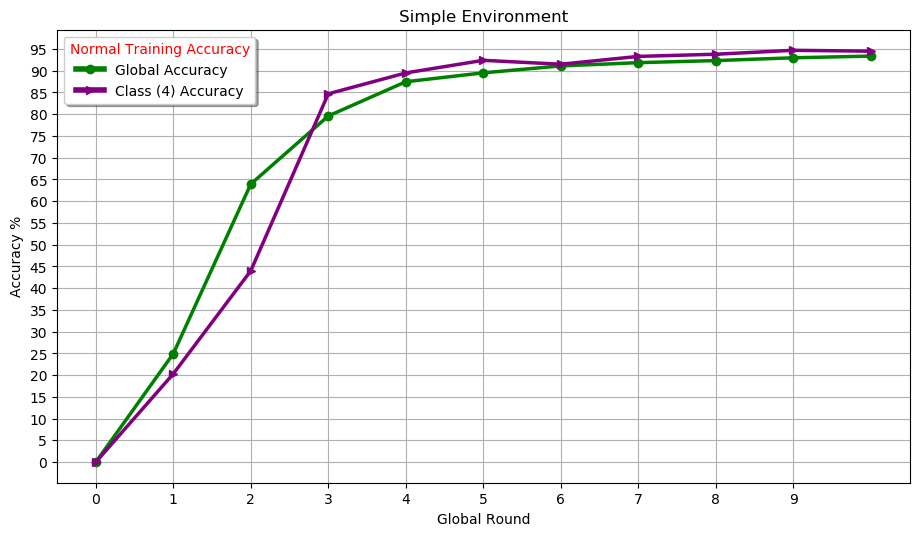

In [8]:
#Experiment2

x = [i for i in range(11)]

y1 = np.asarray([0, 0.2493, 0.6394, 0.796, 0.8747, 0.8952, 0.9111, 0.9186, 0.9234, 0.9298, 0.9337])
y2 = np.asarray([0, 20.3, 44.0,84.7, 89.5, 92.4, 91.5, 93.3, 93.8, 94.7, 94.5])


# make some data
fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Global Accuracy', marker='o', color = 'Green')
ax.plot(x, y2, linewidth=2.5, label='Class (4) Accuracy', marker='>', color = 'Purple')

leg = ax.legend(ncol=1, shadow=True, title="Normal Training Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("Simple Environment")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()



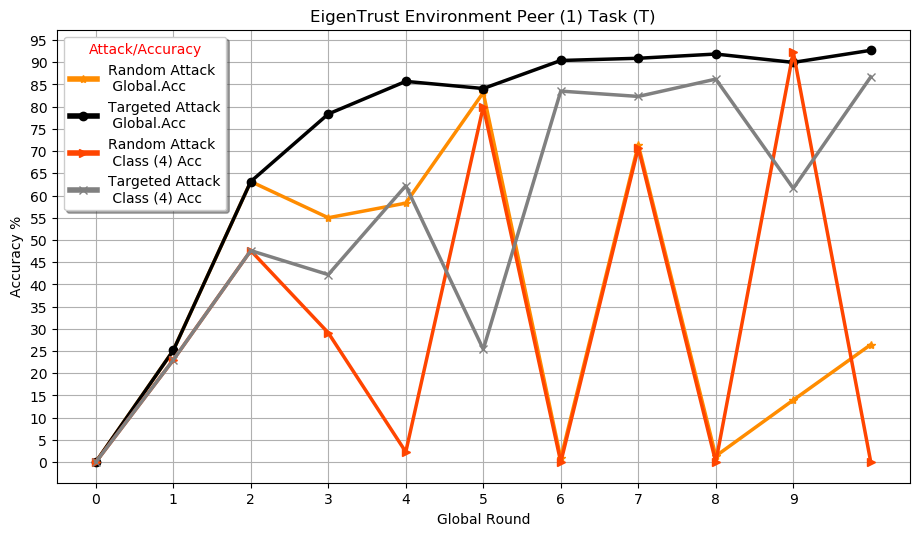

In [9]:
#Experiment2

x = [i for i in range(11)]

y1 = np.asarray([0, 0.2514, 0.6315, 0.55, 0.5829, 0.8317, 0.0085, 0.7145, 0.0137, 0.1397, 0.2645])
y2 = np.asarray([0, 0.2514, 0.6315, 0.7835, 0.8569, 0.8408, 0.9039, 0.9089, 0.9184, 0.8996, 0.9268])
y3 = np.asarray([0, 23.0, 47.6, 29.1, 2.3, 80.0, 0.0, 70.7, 0.0,  92.3, 0.0])
y4 = np.asarray([0, 23.0, 47.6, 42.2, 62.2, 25.4, 83.5, 82.3, 86.2, 61.6, 86.7])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (1) Task (T)")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

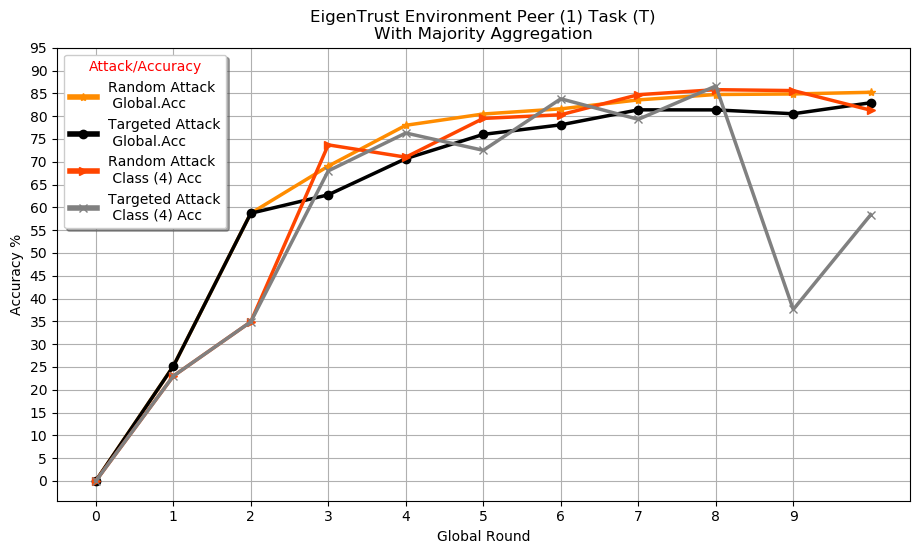

In [8]:
#Experiment 2 (With aggregation of peers updates by the opinions of the accountability managers majority)


x = [i for i in range(11)]

y1 = np.asarray([0, 0.2514, 0.587, 0.6904, 0.7799, 0.8047, 0.816, 0.8356, 0.8474, 0.8486, 0.8523])
y2 = np.asarray([0, 0.2514, 0.587, 0.6275, 0.7068, 0.76, 0.7809, 0.8138, 0.8137, 0.8052, 0.8294])
y3 = np.asarray([0, 23.0, 34.9, 73.7, 71.0, 79.5, 80.3, 84.7,  85.8,  85.6, 81.3])
y4 = np.asarray([0, 23.0, 34.9, 68.0, 76.3, 72.5, 83.8, 79.3, 86.6, 37.6, 58.4 ])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (1) Task (T)\nWith Majority Aggregation")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()


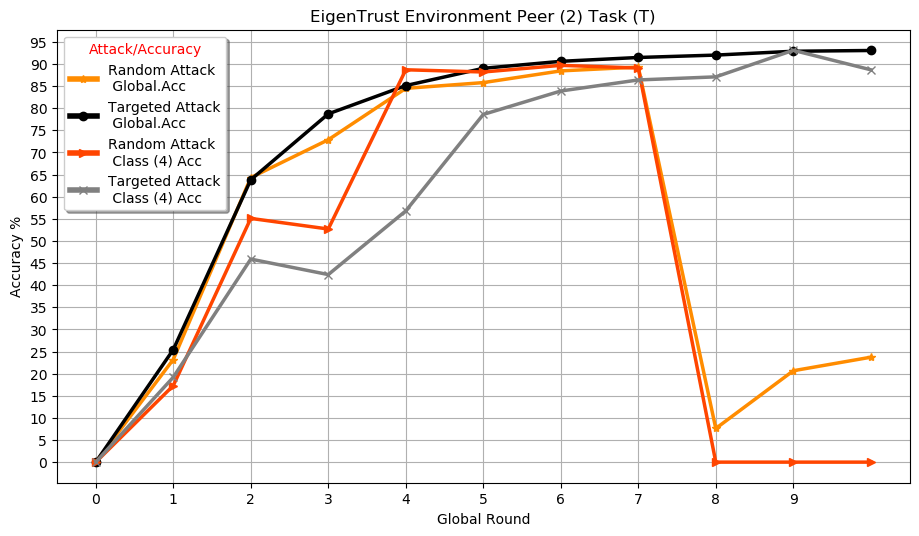

In [9]:
#Experiment2

x = [i for i in range(11)]

y1 = np.asarray([0, 0.232, 0.6432, 0.7288, 0.845, 0.858, 0.8845, 0.8931, 0.0761, 0.2066, 0.2372])
y2 = np.asarray([0, 0.2543, 0.6383, 0.7873, 0.8513, 0.8903, 0.9061, 0.9148, 0.9202, 0.9289, 0.9306])
y3 = np.asarray([0, 17.3, 55.1, 52.7, 88.7, 88.2, 89.7, 89.1, 0.0, 0.0, 0.0])
y4 = np.asarray([0, 19.2, 45.9, 42.4,  56.8, 78.6, 83.9, 86.4, 87.1, 93.1, 88.7])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (2) Task (T)")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

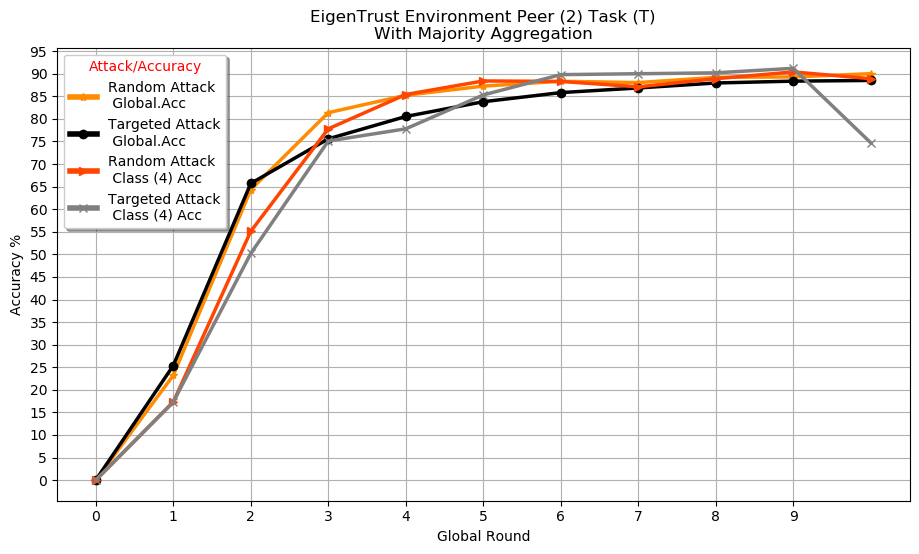

In [7]:
#Experiment 2 (With aggregation of peers updates by the opinions of the accountability managers majority)


x = [i for i in range(11)]

y1 = np.asarray([0, 0.232, 0.6432, 0.8138, 0.8523, 0.8726, 0.8833, 0.8804, 0.892, 0.8929, 0.9001])
y2 = np.asarray([0, 0.2537, 0.6571, 0.7558, 0.8053, 0.838, 0.8582, 0.8685, 0.8795, 0.8836, 0.8851])
y3 = np.asarray([0, 17.3, 55.1, 77.8, 85.4, 88.4, 88.3, 87.1, 88.9, 90.4, 88.9])
y4 = np.asarray([0, 17.3, 50.2, 75.1, 77.8, 85.3, 89.8, 90.0, 90.2, 91.2, 74.7])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (2) Task (T)\nWith Majority Aggregation")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()

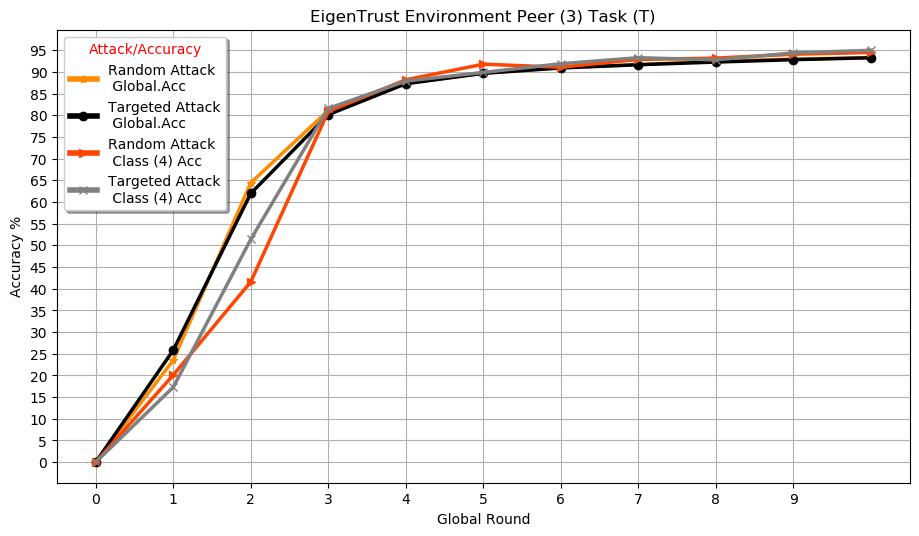

In [11]:
#Experiment2

x = [i for i in range(11)]

y1 = np.asarray([0, 0.2353, 0.6444, 0.8114, 0.8738, 0.8975, 0.9098, 0.9168, 0.925, 0.9299, 0.9333])
y2 = np.asarray([0, 0.2584, 0.6199, 0.8016, 0.8729, 0.8969, 0.9093, 0.9168, 0.9229, 0.9284, 0.9328])
y3 = np.asarray([0, 20.1, 41.6, 80.9, 88.2, 91.8, 91.1, 92.9, 93.2, 94.1, 94.5])
y4 = np.asarray([0, 17.3, 51.4, 81.6, 87.9, 89.9, 91.9, 93.3, 92.8, 94.4, 95.0])



# make some data



fig, ax = plt.subplots(figsize=(11, 6), dpi= 100, facecolor='w', edgecolor='k')

ax.plot(x, y1*100, linewidth=2.5, label='Random Attack\n Global.Acc', marker='*', color = 'darkorange')
ax.plot(x, y2*100, linewidth=2.5, label='Targeted Attack\n Global.Acc', marker='o', color = 'Black')
ax.plot(x, y3, linewidth=2.5, label='Random Attack\n Class (4) Acc', marker='>', color = 'orangered')
ax.plot(x, y4, linewidth=2.5, label='Targeted Attack\n Class (4) Acc', marker='x', color = 'Gray')


leg = ax.legend(ncol=1, shadow=True, title="Attack/Accuracy", fancybox=True, loc = 'best')

for line in leg.get_lines():
    line.set_linewidth(4.0)

leg.get_title().set_color("red")

plt.xlabel("Global Round")
plt.ylabel("Accuracy %")
plt.title("EigenTrust Environment Peer (3) Task (T)")
plt.xticks(np.arange(0, 10, step=1))
plt.yticks(np.arange(0, 100, step=5))
ax.grid(True)
plt.show()